In [1]:
# Done so far
# ***************
#1. basic describe
#2. convert to date
#3. split date and time for dropoff and pickup, but keep original too
#4. merge files with weather data 




# references
# https://beckernick.github.io/neural-network-scratch/ - NN
# https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe
# https://stackoverflow.com/questions/14745022/pandas-dataframe-how-do-i-split-a-column-into-two
# https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python
# https://stackoverflow.com/questions/15736995/how-can-i-quickly-estimate-the-distance-between-two-latitude-longitude-points
# https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column

import numpy as np
import sklearn as sk
import pandas as pd

import csv
from pprint import pprint

# for trying out algos -try nn
# will also try regression, ridge regression etc
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install pyproj
from datetime import timedelta
import datetime as dt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
#from mpl_toolkits.basemap import Basemap
#from mpl_toolkits.basemap import pyproj

#from pyproj import Proj


C:\Users\moomoo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\moomoo


In [3]:
# read n train data
train = pd.read_csv('train.csv')

In [4]:
# high level data 
print(train.head())
print(train.shape)
print(train.describe())
print(train.dtypes)

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [5]:
# split 

#train['dropoff_datetime'] = train['dropoff_datetime'].astype('str') 
#train['pickup_datetime'] = train['pickup_datetime'].astype('str') 
print(train.dtypes)

train['dropoff_date'], train['dropoff_time'] = train['dropoff_datetime'].str.split(' ', 1).str
train['pickup_date'], train['pickup_time'] = train['pickup_datetime'].str.split(' ', 1).str

# https://stackoverflow.com/questions/14745022/pandas-dataframe-how-do-i-split-a-column-into-two
train.head()
#df['stats'].str[1:-1].str.split(',', expand=True).astype(datetime)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:32:30,2016-03-14,17:24:55
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:54:38,2016-06-12,00:43:35
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,12:10:48,2016-01-19,11:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:39:40,2016-04-06,19:32:31
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:38:10,2016-03-26,13:30:55


In [6]:
# convert to date dtype
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
train['dropoff_date'] = pd.to_datetime(train['dropoff_date'])
train['dropoff_time'] = pd.to_datetime(train['dropoff_time'])
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['pickup_date'] = pd.to_datetime(train['pickup_date'])
train['pickup_time'] = pd.to_datetime(train['pickup_time'])


In [7]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dropoff_date          datetime64[ns]
dropoff_time          datetime64[ns]
pickup_date           datetime64[ns]
pickup_time           datetime64[ns]
dtype: object

In [8]:
import datetime
# create time that rounds to nearest 30 minutes
# https://stackoverflow.com/questions/32344533/how-do-i-round-datetime-column-to-nearest-quarter-hour
train['pickup_datetime_round_30'] = train['pickup_datetime'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour))
train['dropoff_datetime_round_30'] = train['dropoff_datetime'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour))


In [9]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,pickup_datetime_round_30,dropoff_datetime_round_30
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2017-09-04 17:32:30,2016-03-14,2017-09-04 17:24:55,2016-03-14 17:00:00,2016-03-14 17:00:00
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2017-09-04 00:54:38,2016-06-12,2017-09-04 00:43:35,2016-06-12 00:00:00,2016-06-12 00:00:00
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2017-09-04 12:10:48,2016-01-19,2017-09-04 11:35:24,2016-01-19 11:00:00,2016-01-19 12:00:00
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2017-09-04 19:39:40,2016-04-06,2017-09-04 19:32:31,2016-04-06 19:00:00,2016-04-06 19:00:00
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2017-09-04 13:38:10,2016-03-26,2017-09-04 13:30:55,2016-03-26 13:00:00,2016-03-26 13:00:00


In [10]:
# https://stackoverflow.com/questions/43577086/process-elements-with-same-id/43577275#43577275
#https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
# add distance types
import math

# 1. euclidean distance
import pandas as pd
import numpy as np



def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [11]:
train['edist'] = haversine_np(train['pickup_longitude'],train['pickup_latitude'],train['dropoff_longitude'],train['dropoff_latitude'])

In [12]:
train.edist.head()

0    1.497580
1    1.804374
2    6.381090
3    1.484566
4    1.187842
Name: edist, dtype: float64

In [13]:
#simple euclidean distance
# https://stackoverflow.com/questions/39147379/euclidean-distance-of-points-coordinates-in-pandas-dataframe

#df['edist2'] = np.sqrt( (train.x1-train.x2)**2 + (train.y1-train.y2)**2 + (train.z1-train.z2)**2)
#df['edist2'] = np.sqrt( (train.pickup_latitude-train.dropoff_latitude)**2 + (train.pickup_longitude-train.dropoff_longitude)**2 + (train.z1-train.z2)**2)

In [14]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_date,dropoff_time,pickup_date,pickup_time,pickup_datetime_round_30,dropoff_datetime_round_30,edist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2017-09-04 17:32:30,2016-03-14,2017-09-04 17:24:55,2016-03-14 17:00:00,2016-03-14 17:00:00,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2017-09-04 00:54:38,2016-06-12,2017-09-04 00:43:35,2016-06-12 00:00:00,2016-06-12 00:00:00,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2017-09-04 12:10:48,2016-01-19,2017-09-04 11:35:24,2016-01-19 11:00:00,2016-01-19 12:00:00,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2017-09-04 19:39:40,2016-04-06,2017-09-04 19:32:31,2016-04-06 19:00:00,2016-04-06 19:00:00,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2017-09-04 13:38:10,2016-03-26,2017-09-04 13:30:55,2016-03-26 13:00:00,2016-03-26 13:00:00,1.187842


In [15]:
# merge the weather data
# https://pandas.pydata.org/pandas-docs/stable/merging.html

#import weather data
weather = pd.read_csv('weather.csv')



In [16]:
# high level data 
print(weather.head())
print(weather.shape)
print(weather.describe())
print(weather.dtypes)

                  Time  Temp.  Windchill  Heat Index  Humidity  Pressure  \
0  2015-12-31 02:00:00    7.8        7.1         NaN      0.89    1017.0   
1  2015-12-31 03:00:00    7.2        5.9         NaN      0.90    1016.5   
2  2015-12-31 04:00:00    7.2        NaN         NaN      0.90    1016.7   
3  2015-12-31 05:00:00    7.2        5.9         NaN      0.86    1015.9   
4  2015-12-31 06:00:00    7.2        6.4         NaN      0.90    1016.2   

   Dew Point  Visibility  Wind Dir  Wind Speed  Gust Speed  Precip Events  \
0        6.1         8.0       NNE         5.6         0.0     0.8   None   
1        5.6        12.9  Variable         7.4         0.0     0.3   None   
2        5.6        12.9      Calm         0.0         0.0     0.0   None   
3        5.0        14.5        NW         7.4         0.0     0.0   None   
4        5.6        11.3      West         5.6         0.0     0.0   None   

  Conditions  
0   Overcast  
1   Overcast  
2   Overcast  
3   Overcast  
4   O

In [17]:
# convert weather dates from string to datetime

weather['pickup_datetime'] = pd.to_datetime(weather['Time'])

In [18]:
#reformat round datetime so it only picks up for the tens of minutes
# create time that rounds to nearest 30 minutes
# https://stackoverflow.com/questions/32344533/how-do-i-round-datetime-column-to-nearest-quarter-hour
weather['pickup_datetime_round_30'] = weather['pickup_datetime'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour))


In [19]:
weather.shape

(8787, 16)

In [20]:
weather.head()

,Time,Temp.,Windchill,Heat Index,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Events,Conditions,pickup_datetime,pickup_datetime_round_30
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31 02:00:00,2015-12-31 02:00:00
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31 03:00:00,2015-12-31 03:00:00
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31 04:00:00,2015-12-31 04:00:00
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31 05:00:00,2015-12-31 05:00:00
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31 06:00:00,2015-12-31 06:00:00


In [21]:
# delete weather duplicates
# https://stackoverflow.com/questions/32093829/pythonpandas-removing-duplicates-based-on-two-columns-keeping-row-with-max-va

weather_dist = weather.drop_duplicates(['pickup_datetime_round_30'], keep='last')

In [22]:
weather_dist.shape

(8787, 16)

In [23]:
# weather_dist with pickup column name
# https://stackoverflow.com/questions/34049618/how-to-add-a-suffix-to-each-column-name
weather_dist_pu = weather_dist.add_suffix('_pu')
weather_dist_do = weather_dist.add_suffix('_do') 


In [24]:
weather_dist_pu.head()
#weather_dist_do.head()

,Time_pu,Temp._pu,Windchill_pu,Heat Index_pu,Humidity_pu,Pressure_pu,Dew Point_pu,Visibility_pu,Wind Dir_pu,Wind Speed_pu,Gust Speed_pu,Precip_pu,Events_pu,Conditions_pu,pickup_datetime_pu,pickup_datetime_round_30_pu
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast,2015-12-31 02:00:00,2015-12-31 02:00:00
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast,2015-12-31 03:00:00,2015-12-31 03:00:00
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast,2015-12-31 04:00:00,2015-12-31 04:00:00
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast,2015-12-31 05:00:00,2015-12-31 05:00:00
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast,2015-12-31 06:00:00,2015-12-31 06:00:00


In [25]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

# rename columns to they are keys
weather_dist_pu = weather_dist_pu.rename(index=str, columns={"pickup_datetime_round_30_pu": "pickup_datetime_round_30"})

In [26]:
# prep for second weather merge for drop off weather
weather_dist_do.head()

# rename columns to they are keys
weather_dist_do = weather_dist_do.rename(index=str, columns={"pickup_datetime_round_30_do": "pickup_datetime_round_30"})



# rename columns to they are keys
weather_dist_do = weather_dist_do.rename(index=str, columns={"dropoff_datetime_round_30_do": "dropoff_datetime_round_30"})

In [34]:

# rename columns to they are keys
weather_dist_do = weather_dist_do.rename(index=str, columns={"pickup_datetime_round_30_do": "dropoff_datetime_round_30"})

weather_dist_do = weather_dist_do.rename(index=str, columns={"pickup_datetime_round_30": "dropoff_datetime_round_30"})

In [28]:
train.dtypes # ok
print("train.dtypes")
print(train.dtypes)
print(" ")
print("weather_dist_pu.dtypes")
print(weather_dist_pu.dtypes)


train.dtypes
id                                   object
vendor_id                             int64
pickup_datetime              datetime64[ns]
dropoff_datetime             datetime64[ns]
passenger_count                       int64
pickup_longitude                    float64
pickup_latitude                     float64
dropoff_longitude                   float64
dropoff_latitude                    float64
store_and_fwd_flag                   object
trip_duration                         int64
dropoff_date                 datetime64[ns]
dropoff_time                 datetime64[ns]
pickup_date                  datetime64[ns]
pickup_time                  datetime64[ns]
pickup_datetime_round_30     datetime64[ns]
dropoff_datetime_round_30    datetime64[ns]
edist                               float64
dtype: object
 
weather_dist_pu.dtypes
Time_pu                             object
Temp._pu                           float64
Windchill_pu                       float64
Heat Index_pu              

In [29]:
# merge the data
# https://stackoverflow.com/questions/18792918/pandas-combining-2-data-frames-join-on-a-common-column
#https://pandas.pydata.org/pandas-docs/stable/merging.html
# https://stackoverflow.com/questions/21786490/pandas-left-outer-join-multiple-dataframes-on-multiple-columns



trainm = pd.merge(train, weather_dist, on='pickup_datetime_round_30', how='left')
trainm_pickup = pd.merge(train, weather_dist, on='pickup_datetime_round_30', how='left')

trainm_pu = pd.merge(train, weather_dist_pu, on='pickup_datetime_round_30', how='left')





In [33]:
#trainm_pu.dtypes
weather_dist_do.dtypes

Time_do                             object
Temp._do                           float64
Windchill_do                       float64
Heat Index_do                      float64
Humidity_do                        float64
Pressure_do                        float64
Dew Point_do                       float64
Visibility_do                      float64
Wind Dir_do                         object
Wind Speed_do                      float64
Gust Speed_do                      float64
Precip_do                          float64
Events_do                           object
Conditions_do                       object
pickup_datetime_do          datetime64[ns]
pickup_datetime_round_30    datetime64[ns]
dtype: object

In [35]:
trainm_pudo = pd.merge(trainm_pu, weather_dist_do, on='dropoff_datetime_round_30', how='left') #joins pu and no

In [45]:
# include day of the week column
# https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python

trainm_pudo['weekday'] = trainm_pudo['pickup_datetime'].dt.weekday_name

In [46]:
#normalise

trainm_pudo.dtypes

id                                   object
vendor_id                             int64
pickup_datetime              datetime64[ns]
dropoff_datetime             datetime64[ns]
passenger_count                       int64
pickup_longitude                    float64
pickup_latitude                     float64
dropoff_longitude                   float64
dropoff_latitude                    float64
store_and_fwd_flag                   object
trip_duration                         int64
dropoff_date                 datetime64[ns]
dropoff_time                 datetime64[ns]
pickup_date                  datetime64[ns]
pickup_time                  datetime64[ns]
pickup_datetime_round_30     datetime64[ns]
dropoff_datetime_round_30    datetime64[ns]
edist                               float64
Time_pu                              object
Temp._pu                            float64
Windchill_pu                        float64
Heat Index_pu                       float64
Humidity_pu                     

In [39]:
trainm_pudo.shape

(1458644, 49)

In [71]:
trainm_pudo.dropoff_date.head()

0   2016-03-14
1   2016-06-12
2   2016-01-19
3   2016-04-06
4   2016-03-26
Name: dropoff_date, dtype: datetime64[ns]

In [72]:
# include public holidays flag
# include flag for data
# include type of holiday-  bigger holidays vs smaller?

#1. load public holiday CSV

phol = pd.read_csv('publicholsny.csv')
phol.shape
phol.head()

,pickup_date,Event
0,2016-01-01,NewYearsDay
1,2016-01-18,DrMartinLutherKingDay
2,2016-02-12,LincolnsBirthday
3,2016-02-15,PresidentsDay
4,2016-05-08,MothersDay


In [73]:
phol['pickup_date'] = pd.to_datetime(phol['pickup_date'])

In [74]:
# left outer join between trainm_pudo and phol to include holidays
# convert joined data to holiday type Y or N


trainm_pickup = pd.merge(trainm_pudo, phol, on='pickup_date', how='left') #joins pu and no

In [76]:
trainm_pickup.Event.unique()

array([nan, 'LincolnsBirthday', 'PresidentsDay', 'DrMartinLutherKingDay',
       'FatherDay', 'NewYearsDay', 'MothersDay', 'MemorialDay'], dtype=object)

In [80]:
#convert nan to N
trainm_pickup['Event'].fillna(0, inplace=True)

In [79]:
trainm_pickup.Event.unique()

array([0, 'LincolnsBirthday', 'PresidentsDay', 'DrMartinLutherKingDay',
       'FatherDay', 'NewYearsDay', 'MothersDay', 'MemorialDay'], dtype=object)

In [81]:
# compare distance with my calculation - from Rob M
# Additional distance measure  -merge some code with Rob M's here
#myProj = Proj("+proj=utm +zone=18T, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
#df['pickup_UTMx'], df['pickup_UTMy'] = myProj(df['pickup_longitude'].values, df['pickup_latitude'].values)
#df['dropoff_UTMx'], df['dropoff_UTMy'] = myProj(df['dropoff_longitude'].values, df['dropoff_latitude'].values)

# compare distance with my calculation - from Rob M
#df['xdist'] = abs(df['dropoff_UTMx'] - df['pickup_UTMx'])
#df['ydist'] = abs(df['dropoff_UTMy'] - df['pickup_UTMy'])


# compare distance with my calculation - from Rob M
#df['euc_dist'] = np.sqrt(df['xdist']**2 + df['ydist']**2)
#df['m_dist'] = df['xdist'] + df['ydist']
# df['euc_dist'] = np.linalg.norm(x - y)

# Add average speed - from Rob M
# average speed
#df['av_m_speed'] = df['m_dist'] / df['trip_duration']


MemoryError: 

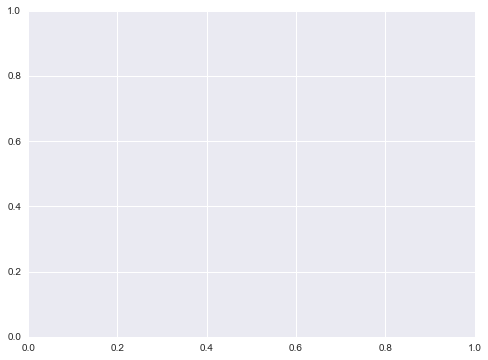

In [83]:
# visualise

from matplotlib import pyplot as plt

plt.figure(figsize =(8,6) )
plt.plot(df)
#plt.xlabel('variable')
plt.show()

In [82]:
df = trainm_pickup

In [ ]:
# split into train and test


In [96]:
# take out the y variable
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# spit into 50/50
df_train, df_test = train_test_split(df, test_size=0.4)
# 
y_train = df_train['trip_duration']
x_train = df_train['edist'].reshape(-1,1)

# 
y_test = df_test['trip_duration']
x_test = df_test['edist'].reshape(-1,1)


ols = linear_model.LinearRegression()
model = ols.fit(x_train, y_train)
print(model.predict(x_test)[0:5])

MemoryError: 

In [ ]:
# split up train data and remove the train target column

In [ ]:
# ridge regression



In [ ]:
# SVM

In [ ]:
# Decision tree

In [ ]:
from sklearn import tree
from os import system

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=10)
regressor, fit(np.array(df['trip_duration']))

#regressor.predict(insert array)
# get the training values split
xx = np.array